[View in Colaboratory](https://colab.research.google.com/github/raahatg21/Cats-and-Dogs-Dataset-with-Keras/blob/master/Cats_Dogs_1.ipynb)

**Using CNN made from scratch. Dataset consists only of 2,000 training, 1,000 validation and 1,000 testing samples. All images stored in Drive. 73.4% Validation Accuracy. 74.49% Testing Accuracy.**

# Cats vs Dogs: Binary Classification

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
plt.style.use('fivethirtyeight')

In [2]:
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
# Accessing Google Drive files in Colab

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass

!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .

In [0]:
# Making a directory named 'Drive' and linking it with Google Drive

!mkdir -p drive
!google-drive-ocamlfuse drive

In [5]:
!ls 

adc.json  drive  sample_data


In [6]:
!ls drive/cats_and_dogs_small

test  train  validation


In [7]:
!ls drive/cats_and_dogs_small/train

cats  dogs


In [0]:
train_dir = 'drive/cats_and_dogs_small/train'
val_dir = 'drive/cats_and_dogs_small/validation'
test_dir = 'drive/cats_and_dogs_small/test'

In [9]:
!ls train_dir

ls: cannot access 'train_dir': No such file or directory


In [10]:
print('total training images:', len(os.listdir(train_dir)))

total training images: 2


In [0]:
# Building the Model 

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model1.add(layers.MaxPooling2D(2, 2))
model1.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D(2, 2))
model1.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D(2, 2))
model1.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model1.add(layers.MaxPooling2D(2, 2))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [0]:
# Compiling the Model

model1.compile(optimizer = optimizers.RMSprop(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['acc'])

In [14]:
# Preprocessing Images using Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1./255)  # Add parameters here for Data Augmentation
test_datagen = ImageDataGenerator(rescale = 1./255)   # Do not add any more parameters here

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
val_generator = test_datagen.flow_from_directory(val_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# Looking at the Output of Image Data Generator

for data_batch, labels_batch in train_generator:
  print('Data Batch Shape', data_batch.shape)
  print('Labels Batch Shape', labels_batch.shape)
  break

Data Batch Shape (20, 150, 150, 3)
Labels Batch Shape (20,)


In [16]:
# Training

history = model1.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = val_generator, validation_steps = 50)

# steps_per_epoch = 2000/20 = 100, validation_steps = 1000/20 = 50

Epoch 1/30
100/100 [==============================] - 2165s 22s/step - loss: 0.6915 - acc: 0.5160 - val_loss: 0.6745 - val_acc: 0.6070
Epoch 2/30
100/100 [==============================] - 29s 286ms/step - loss: 0.6649 - acc: 0.6105 - val_loss: 0.6496 - val_acc: 0.6270
Epoch 3/30
100/100 [==============================] - 27s 267ms/step - loss: 0.6239 - acc: 0.6695 - val_loss: 0.6282 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 28s 278ms/step - loss: 0.5794 - acc: 0.6955 - val_loss: 0.6160 - val_acc: 0.6500
Epoch 5/30
100/100 [==============================] - 27s 272ms/step - loss: 0.5462 - acc: 0.7165 - val_loss: 0.5999 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 28s 282ms/step - loss: 0.5091 - acc: 0.7530 - val_loss: 0.5844 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 27s 274ms/step - loss: 0.4778 - acc: 0.7680 - val_loss: 0.5492 - val_acc: 0.7250
Epoch 8/30
100/100 [==============================] - 2

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

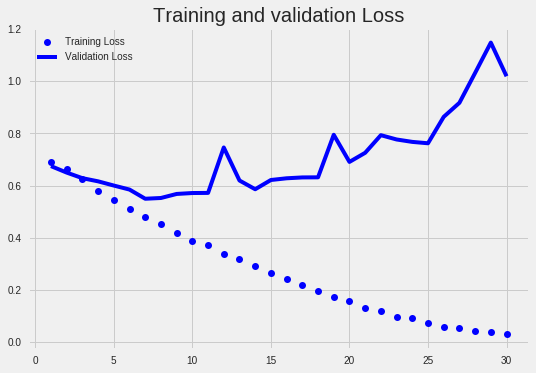

In [18]:
# Plotting Training and Validation Loss

epochs = range(1, 31)
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()

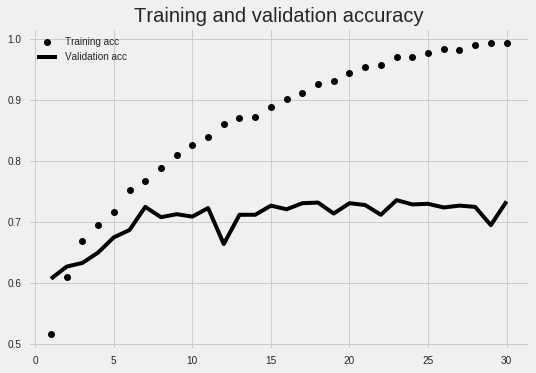

In [19]:
# Plotting Training and Validation Accuracy

plt.plot(epochs, acc, 'ko', label='Training acc')
plt.plot(epochs, val_acc, 'k', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [20]:
# Testing

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
test_loss, test_acc = model1.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1007 images belonging to 2 classes.
test acc: 0.7449999976158143
